Data preprocessing


In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# --------------------
# Step 1: Load the dataset with proper encoding and error handling.
# --------------------
df = pd.read_csv(
    "training.1600000.processed.noemoticon.csv",
    encoding="ISO-8859-1",  # Fix for UnicodeDecodeError
    header=None,
    quoting=3,
    on_bad_lines='skip'
)

# Keep only the first six columns and limit to the first 500 rows.
df = df.iloc[:500, :6]  # This selects only the first 500 rows.

# --------------------
# Step 2: Clean and filter the target column (column 0).
# --------------------
# The target values are stored with extra quotes (e.g. '"0"', '"4"')
# Remove the double quotes.
df[0] = df[0].str.replace('"', '', regex=False)

# Convert the target values from strings to numeric.
df[0] = pd.to_numeric(df[0], errors='coerce')

# Filter to keep only rows where the target (column 0) is either 0 or 4.
df = df[df[0].isin([0, 4])].copy()

# --------------------
# Step 3: Clean the text data (column 5).
# --------------------
# Convert text to lowercase.
df[5] = df[5].str.lower()

# Remove URLs and Twitter mentions.
df[5] = df[5].str.replace(r"http\S+|www\S+|@\S+", "", regex=True)

# Replace any non-letter characters with a space (this helps to preserve word boundaries).
df[5] = df[5].str.replace(r"[^a-zA-Z\s]", " ", regex=True)

# Collapse multiple spaces into one.
df[5] = df[5].str.replace(r"\s+", " ", regex=True)

# Remove leading and trailing whitespace.
df[5] = df[5].str.strip()

# Remove any rows where the text becomes empty after cleaning.
df = df[df[5] != ""]

# Optional: Check a few cleaned text samples.
print("Sample cleaned text:")
print(df[5].head())

# --------------------
# Step 4: Vectorize the text using TF-IDF.
# --------------------
# Use a token pattern that includes single-character tokens if needed.
vectorizer = TfidfVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None)
X_tfidf = vectorizer.fit_transform(df[5])

# --------------------
# Step 5: Convert to NumPy arrays.
# --------------------
# The TF-IDF data as a NumPy array:
X = X_tfidf.toarray()
# The target labels from column 0:
y = df[0].values

# --------------------
# Step 6: Split into training and testing sets.
# --------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Confirm the shapes of the split arrays.
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Sample cleaned text:
0                                                 awww
1    is upset that he can t update his facebook by ...
2    i dived many times for the ball managed to sav...
3       my whole body feels itchy and like its on fire
4                                                   no
Name: 5, dtype: object
X_train shape: (396, 1649)
X_test shape: (99, 1649)
y_train shape: (396,)
y_test shape: (99,)


In [4]:
df.head()

,0,1,2,3,4,5
0,0,"""1467810369""","""Mon Apr 06 22:19:45 PDT 2009""","""NO_QUERY""","""_TheSpecialOne_""",awww
1,0,"""1467810672""","""Mon Apr 06 22:19:49 PDT 2009""","""NO_QUERY""","""scotthamilton""",is upset that he can t update his facebook by ...
2,0,"""1467810917""","""Mon Apr 06 22:19:53 PDT 2009""","""NO_QUERY""","""mattycus""",i dived many times for the ball managed to sav...
3,0,"""1467811184""","""Mon Apr 06 22:19:57 PDT 2009""","""NO_QUERY""","""ElleCTF""",my whole body feels itchy and like its on fire
4,0,"""1467811193""","""Mon Apr 06 22:19:57 PDT 2009""","""NO_QUERY""","""Karoli""",no


In [5]:
print(X)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.12020822 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [6]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [8]:
print(X_train)
print(X_train.shape)

[[0.15931001 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.21218806 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(396, 1649)


In [9]:
print(X_test)
print(X_test.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.21686136 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(99, 1649)


In [10]:
print(X_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5342 stored elements and shape (495, 1649)>
  Coords	Values
  (0, 101)	1.0
  (1, 720)	0.11713036829426082
  (1, 1508)	0.2382050785131894
  (1, 1389)	0.13936803932685218
  (1, 625)	0.20464961732028372
  (1, 217)	0.17325860753794328
  (1, 1359)	0.1246921898298561
  (1, 1505)	0.2599449851413707
  (1, 655)	0.24770170465047575
  (1, 458)	0.2772009198109577
  (1, 200)	0.20464961732028372
  (1, 1384)	0.2772009198109577
  (1, 724)	0.12712475883595722
  (1, 53)	0.11813178794279164
  (1, 879)	0.23044576998088878
  (1, 324)	0.22388536809382437
  (1, 80)	0.22388536809382437
  (1, 0)	0.12020821787126171
  (1, 1151)	0.2772009198109577
  (1, 1197)	0.23044576998088878
  (1, 1426)	0.17920664819222556
  (1, 44)	0.24770170465047575
  (1, 153)	0.2772009198109577
  (2, 693)	0.08970239352967456
  (2, 374)	0.3230844258778583
  :	:
  (492, 939)	0.27772937273616266
  (492, 209)	0.27772937273616266
  (493, 724)	0.2432987011440054
  (493, 53)	0.113043

In [11]:
print(y_train)
print(y_train.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(396,)


In [13]:
print(y_test)
print(y_test.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(99,)


Quick EDA

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Distribution of Sentimet Labels


Distribution of Sentiment Labels (0: negative, 4: positive):
0
0    495
Name: count, dtype: int64


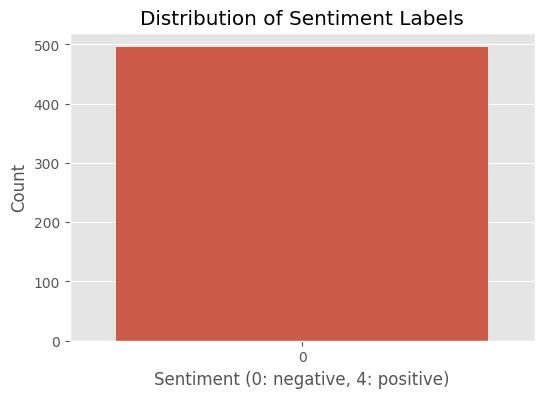

In [15]:
sentiment_counts = df[0].value_counts().sort_index()
print("\nDistribution of Sentiment Labels (0: negative, 4: positive):")
print(sentiment_counts)

plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index.astype(str), y=sentiment_counts.values)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment (0: negative, 4: positive)')
plt.ylabel('Count')
plt.show()

Distribution of Text lengths.
Craete a new column for text lengths


Descriptive statistics of text lengths:
count    495.000000
mean      55.123232
std       34.543333
min        2.000000
25%       28.000000
50%       48.000000
75%       79.000000
max      139.000000
Name: text_length, dtype: float64


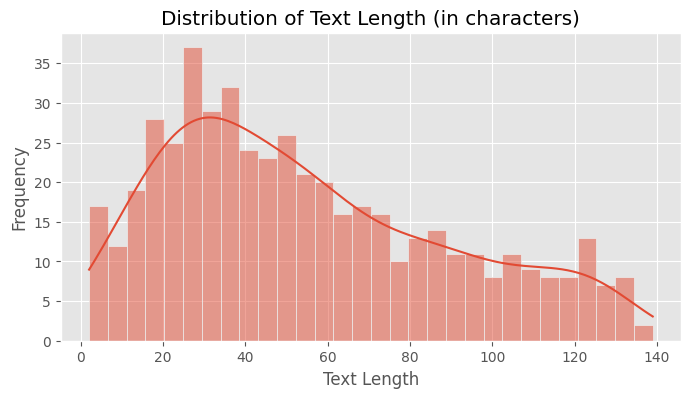

In [16]:
df['text_length'] = df[5].apply(len)
print("\nDescriptive statistics of text lengths:")
print(df['text_length'].describe())

plt.figure(figsize=(8, 4))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Length (in characters)')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

Sum up the TF-IDF weights across all documents for each term

In [19]:
tfidf_sum = np.array(X_tfidf.sum(axis=0)).flatten()
print(tfidf_sum)
print(tfidf_sum.shape)

[13.49784211  0.60350257  0.25305029 ...  0.36669603  0.27625148
  0.39187245]
(1649,)


Get feature names from the vectorizer

In [21]:
vocab = vectorizer.get_feature_names_out()
print(vocab)

['a' 'aaaaand' 'aaw' ... 'yucky' 'yup' 'zoo']


Create a DataFrame for words and their corresponding total TF-IDF weights.

In [22]:
tfidf_df = pd.DataFrame({'word': vocab, 'total_tfidf': tfidf_sum})

Sort by weight in descending order to obtain the most influential words.


Top 10 words by total TF-IDF weight:
     word  total_tfidf
693     i    34.698225
1424   to    21.083406
1391  the    19.247090
913    my    18.061682
720    is    15.813646
0       a    13.497842
1359    t    13.396581
53    and    12.966009
724    it    12.720936
1640  you    11.757520


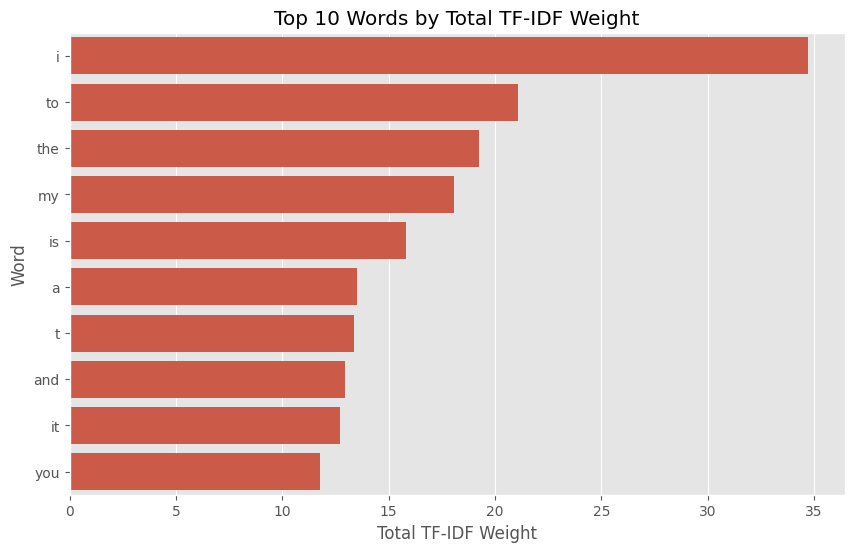

In [23]:
tfidf_df = tfidf_df.sort_values(by='total_tfidf', ascending=False)
print("\nTop 10 words by total TF-IDF weight:")
print(tfidf_df.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x="total_tfidf", y="word", data=tfidf_df.head(10))
plt.title('Top 10 Words by Total TF-IDF Weight')
plt.xlabel('Total TF-IDF Weight')
plt.ylabel('Word')
plt.show()

Basic NTLK

In [24]:
import nltk
import matplotlib.pyplot as plt

Download necessary NTLK data files

In [29]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')


from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Combine all cleaned text into one large string

In [27]:
all_text = " ".join(df[5].tolist())
print(all_text)

awww is upset that he can t update his facebook by texting it and might cry as a result school today also blah i dived many times for the ball managed to save the rest go out of bounds my whole body feels itchy and like its on fire no not the whole crew need a hug nope they didn t have it que me muera spring break in plain city it s snowing i just re pierced my ears i couldn t bear to watch it and i thought the ua loss was embarrassing it it counts i wish i got to watch it with you i miss you and how was the premiere hollis death scene will hurt me severely to watch on film wry is directors cut not out now about to file taxes ahh ive always wanted to see rent love the soundtrack oh dear were you drinking out of the forgotten table drinks i was out most of the day so didn t get much done one of my friend called me i baked you a cake but i ated it this week is not going as i had hoped blagh class at tomorrow i hate when i have to call and wake people up just going to cry myself to sleep 

Tokenize the text into words

In [30]:
tokens = word_tokenize(all_text)

Convert tokens to lowercase to ensure consistency

In [31]:
tokens = [token.lower() for token in tokens]

Remove tokens that are not purely alhabetic

In [32]:
tokens = [token for token in tokens if token.isalpha()]

Load English stopwords

In [33]:
stop_words = set(stopwords.words('english'))

Filter out stopwords

In [34]:
filtered_tokens = [token for token in tokens if token not in stop_words]

Create a frequency distribution of the filtered tokens.

In [35]:
freq_dist = nltk.FreqDist(filtered_tokens)

print("Total number of tokens:", len(tokens))
print("Total number of tokens after filtering stopwords and non-alphabetic tokens:", len(filtered_tokens))
print("\nTop 10 Most Common Tokens:")
print(freq_dist.most_common(10))

Total number of tokens: 5760
Total number of tokens after filtering stopwords and non-alphabetic tokens: 2978

Top 10 Most Common Tokens:
[('get', 29), ('like', 25), ('going', 24), ('today', 20), ('day', 20), ('sad', 20), ('good', 20), ('know', 20), ('time', 19), ('back', 19)]


Plot the top 10 most common words

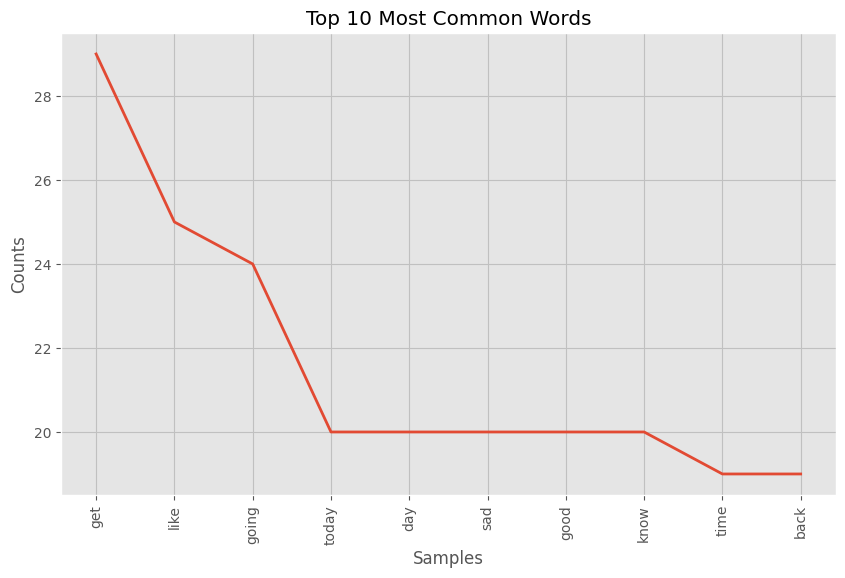

In [36]:
plt.figure(figsize=(10, 6))
freq_dist.plot(10, title='Top 10 Most Common Words')
plt.show()

Perform part of speech tagging on asample text

In [38]:
import nltk
import matplotlib.pyplot as plt

# ... (your existing code) ...

# Download necessary NTLK data files
nltk.download('punkt')
nltk.download('stopwords')
# Download with the language-specific resource identifier
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')

# ... (rest of your existing code) ...

sample_text = df[5].iloc[0]
sample_tokens = word_tokenize(sample_text)
sample_tags = nltk.pos_tag(sample_tokens)

print("\nSample text:", sample_text)
print("POS tags:", sample_tags)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!



Sample text: awww
POS tags: [('awww', 'NN')]


Vader Sentiment Scoring

In [39]:
from nltk.sentiment import SentimentIntensityAnalyzer

Download VADER lexicon

In [40]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

Calculate VADER sentiment Scoring for each text.

In [42]:
sia = SentimentIntensityAnalyzer()

df['vader_scores'] = df[5].apply(lambda text: sia.polarity_scores(text))

Extract the compound score for the summary measure

In [44]:
df['compound'] = df['vader_scores'].apply(lambda scores: scores['compound'])
print(df['compound'])

0      0.0000
1     -0.7269
2      0.4939
3     -0.2500
4     -0.2960
        ...  
495    0.6597
496   -0.4404
497    0.4404
498   -0.5909
499    0.2960
Name: compound, Length: 495, dtype: float64


classify sentiment based on the compound score.

In [45]:
#    compound >= 0.05  → Positive
#    compound <= -0.05 → Negative
#    else              → Neutral
df['vader_sentiment'] = df['compound'].apply(lambda score: 'positive' if score >= 0.05
                                               else ('negative' if score <= -0.05 else 'neutral'))

# Display the first few rows with the VADER results.
print(df[['vader_scores', 'compound', 'vader_sentiment']].head())

                                        vader_scores  compound vader_sentiment
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000         neutral
1  {'neg': 0.295, 'neu': 0.705, 'pos': 0.0, 'comp...   -0.7269        negative
2  {'neg': 0.0, 'neu': 0.814, 'pos': 0.186, 'comp...    0.4939        positive
3  {'neg': 0.321, 'neu': 0.5, 'pos': 0.179, 'comp...   -0.2500        negative
4  {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound...   -0.2960        negative


Plot VADER Results

<ipython-input-46-d11f06a83a77>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")


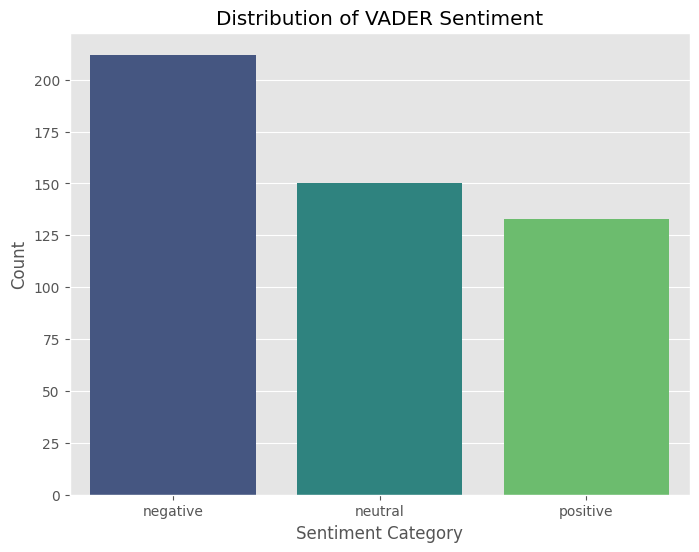

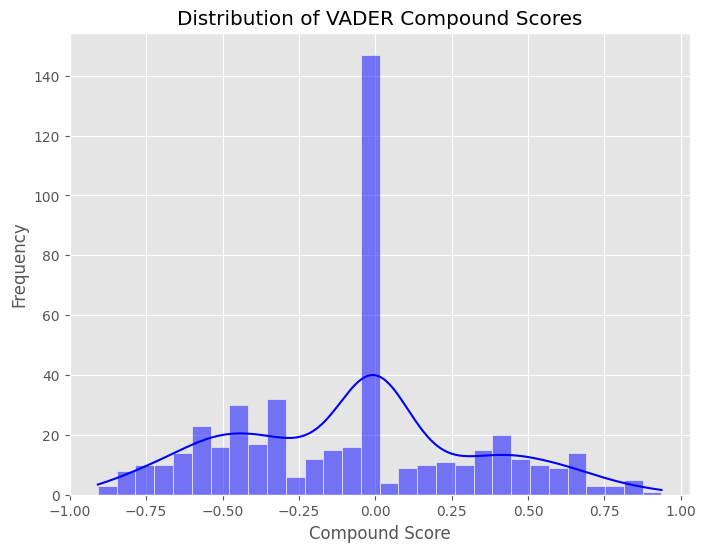

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of VADER sentiment categories
sentiment_counts = df['vader_sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="viridis")
plt.title("Distribution of VADER Sentiment")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

# Histogram of VADER compound scores
plt.figure(figsize=(8, 6))
sns.histplot(df['compound'], bins=30, kde=True, color="blue")
plt.title("Distribution of VADER Compound Scores")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.show()


Roberta Pretrained Model.Here,we use Hugging Face's Transformer library with a RoBERTa model that has been fine‑tuned for Twitter sentiment analysis.

In [47]:
from transformers import pipeline

Initialize the RoBERTa Sentiment Analysis Pipeline

In [48]:
classifier = pipeline(
    'sentiment-analysis',
    model='cardiffnlp/twitter-roberta-base-sentiment',
    tokenizer='cardiffnlp/twitter-roberta-base-sentiment',
    truncation=True  # ensure texts longer than model limits are properly truncated
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

Device set to use cpu


In [50]:
texts = df[5].tolist()
# Apply the classifier on all texts (batch processing helps with speed)
results = classifier(texts, truncation=True)

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [51]:
df['roberta_sentiment'] = [result['label'] for result in results]
df['roberta_score'] = [result['score'] for result in results]

Bar plot  of sentiment distribution

<ipython-input-52-1197c87f6f9c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')


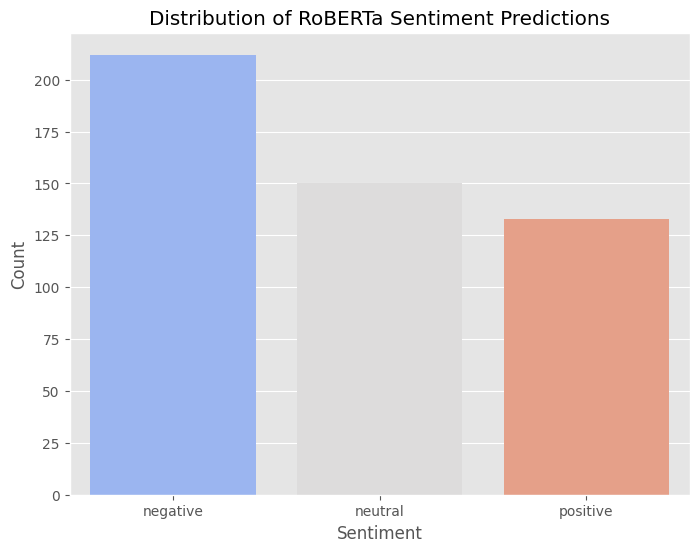

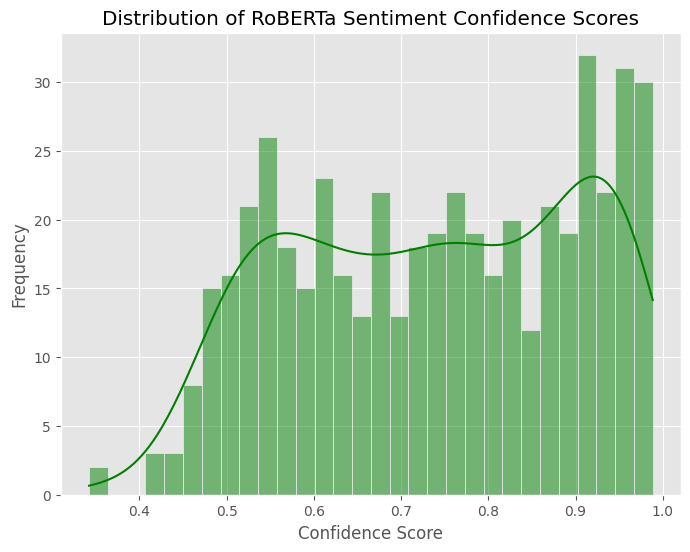

In [52]:
entiment_counts = df['roberta_sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='coolwarm')
plt.title("Distribution of RoBERTa Sentiment Predictions")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Histogram of the confidence scores from RoBERTa
plt.figure(figsize=(8, 6))
sns.histplot(df['roberta_score'], bins=30, kde=True, color='green')
plt.title("Distribution of RoBERTa Sentiment Confidence Scores")
plt.xlabel("Confidence Score")
plt.ylabel("Frequency")
plt.show()

Comapre between two models

In [53]:
df['vader_sentiment'] = df['vader_sentiment'].str.lower()
df['roberta_sentiment'] = df['roberta_sentiment'].str.lower()

Cross Tabulation (HeatMAp) of Sentiment Predictions

Cross Tabulation (counts):
roberta_sentiment  label_0  label_1  label_2
vader_sentiment                             
negative               162       44        6
neutral                 53       91        6
positive                45       48       40

Cross Tabulation (row-normalized):
roberta_sentiment   label_0   label_1   label_2
vader_sentiment                                
negative           0.764151  0.207547  0.028302
neutral            0.353333  0.606667  0.040000
positive           0.338346  0.360902  0.300752


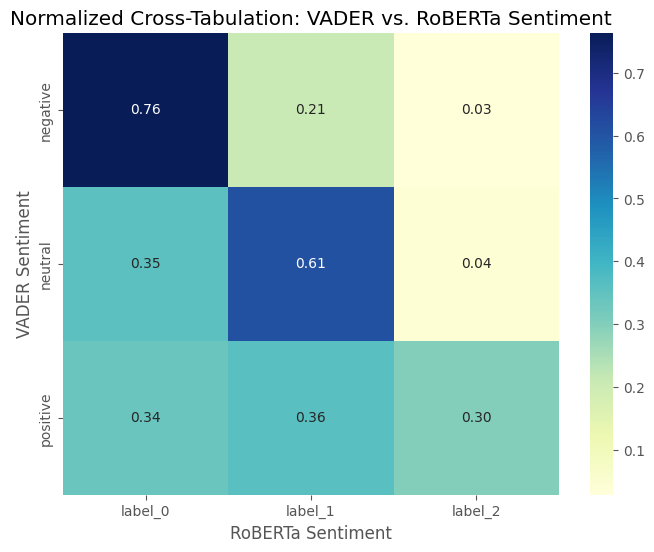

In [54]:
# Create a cross-tabulation counting the occurrence of each combination.
crosstab = pd.crosstab(df['vader_sentiment'], df['roberta_sentiment'])

# Also create a normalized version (percentage row-wise).
crosstab_norm = pd.crosstab(df['vader_sentiment'], df['roberta_sentiment'], normalize='index')

print("Cross Tabulation (counts):")
print(crosstab)

print("\nCross Tabulation (row-normalized):")
print(crosstab_norm)

plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_norm, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Normalized Cross-Tabulation: VADER vs. RoBERTa Sentiment")
plt.xlabel("RoBERTa Sentiment")
plt.ylabel("VADER Sentiment")
plt.show()

In [55]:
sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
if 'roberta_numeric' not in df.columns:
    df['roberta_numeric'] = df['roberta_sentiment'].map(sentiment_mapping)

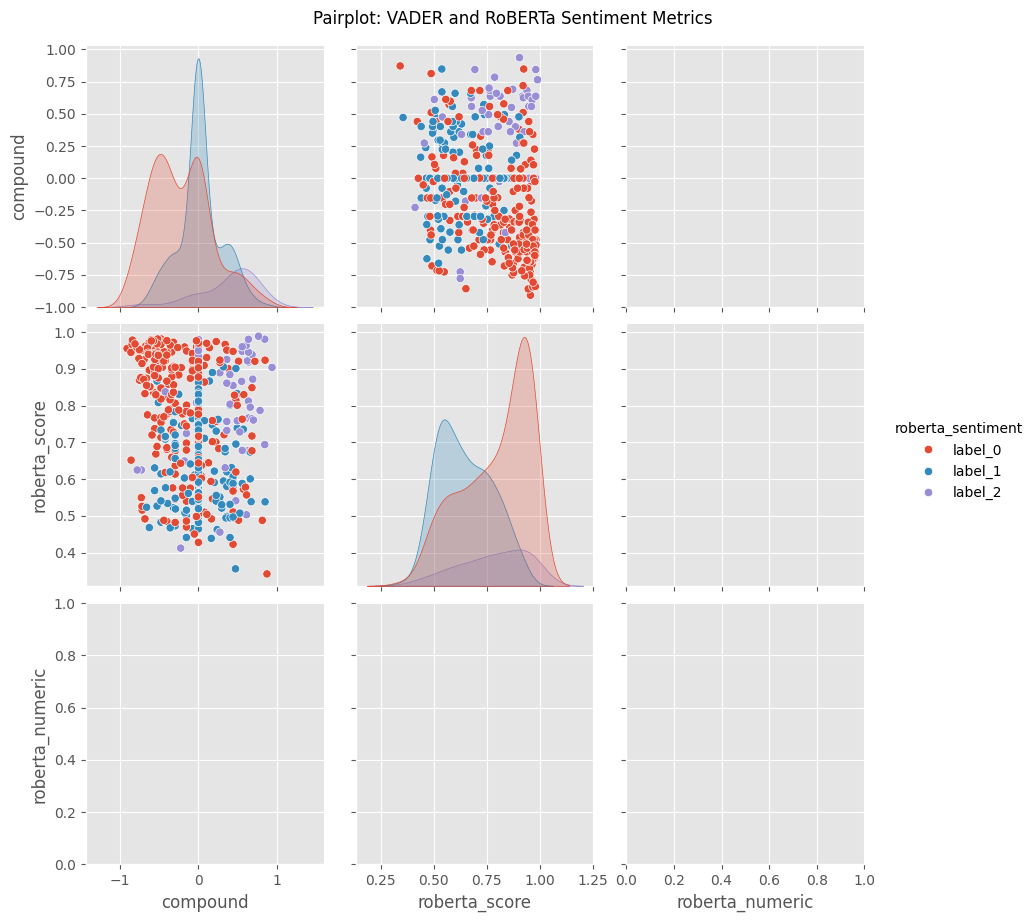

In [56]:
plot_cols = ["compound", "roberta_score", "roberta_numeric"]

# Create the pairplot. We add hue using 'roberta_sentiment' for a richer visualization.
sns.pairplot(
    df[plot_cols + ["roberta_sentiment"]],
    hue="roberta_sentiment",
    diag_kind="kde",
    height=3
)
plt.suptitle("Pairplot: VADER and RoBERTa Sentiment Metrics", y=1.02)
plt.show()